## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  62.245574  1367.010441  0.244496  8.754903   340.029810
1  58.659582  1364.874918  0.932094  1.740748  1273.596322
2  67.593482   206.224693  0.039900  6.424176    68.066468
3   5.817562  1628.466926  0.021127  4.482528    34.892619
4  18.306354  1236.676043  0.322862  4.353108   399.688713


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9989784	total: 68.5ms	remaining: 1m 8s
1:	learn: 0.9887587	total: 69ms	remaining: 34.4s
2:	learn: 0.9786305	total: 69.4ms	remaining: 23.1s
3:	learn: 0.9677514	total: 69.8ms	remaining: 17.4s
4:	learn: 0.9540337	total: 70.2ms	remaining: 14s
5:	learn: 0.9450398	total: 70.7ms	remaining: 11.7s
6:	learn: 0.9315385	total: 71ms	remaining: 10.1s
7:	learn: 0.9184056	total: 71.5ms	remaining: 8.86s
8:	learn: 0.9070428	total: 72ms	remaining: 7.93s
9:	learn: 0.8950143	total: 72.4ms	remaining: 7.17s
10:	learn: 0.8829119	total: 73ms	remaining: 6.56s
11:	learn: 0.8694869	total: 73.3ms	remaining: 6.03s
12:	learn: 0.8586915	total: 73.6ms	remaining: 5.59s
13:	learn: 0.8506411	total: 74ms	remaining: 5.21s
14:	learn: 0.8401672	total: 74.5ms	remaining: 4.89s
15:	learn: 0.8300646	total: 74.8ms	remaining: 4.6s
16:	learn: 0.8212977	total: 75.2ms	remaining: 4.35s
17:	learn: 0.8122007	total: 75.6ms	remaining: 4.13s
18:	learn: 0.8048705	total: 76.1ms	remaining: 3.93s
19:	l

81:	learn: 0.4021155	total: 106ms	remaining: 1.18s
82:	learn: 0.3977497	total: 106ms	remaining: 1.17s
83:	learn: 0.3937703	total: 107ms	remaining: 1.16s
84:	learn: 0.3899984	total: 107ms	remaining: 1.15s
85:	learn: 0.3856771	total: 108ms	remaining: 1.14s
86:	learn: 0.3826035	total: 108ms	remaining: 1.13s
87:	learn: 0.3788639	total: 108ms	remaining: 1.12s
88:	learn: 0.3754318	total: 109ms	remaining: 1.11s
89:	learn: 0.3721017	total: 109ms	remaining: 1.1s
90:	learn: 0.3682406	total: 110ms	remaining: 1.1s
91:	learn: 0.3648645	total: 110ms	remaining: 1.08s
92:	learn: 0.3619817	total: 110ms	remaining: 1.07s
93:	learn: 0.3586179	total: 111ms	remaining: 1.07s
94:	learn: 0.3548214	total: 111ms	remaining: 1.06s
95:	learn: 0.3513616	total: 112ms	remaining: 1.05s
96:	learn: 0.3477840	total: 112ms	remaining: 1.04s
97:	learn: 0.3445596	total: 112ms	remaining: 1.03s
98:	learn: 0.3408114	total: 113ms	remaining: 1.03s
99:	learn: 0.3372780	total: 114ms	remaining: 1.02s
100:	learn: 0.3334551	total: 114m

260:	learn: 0.0901773	total: 187ms	remaining: 529ms
261:	learn: 0.0895632	total: 187ms	remaining: 528ms
262:	learn: 0.0890256	total: 188ms	remaining: 526ms
263:	learn: 0.0884736	total: 188ms	remaining: 525ms
264:	learn: 0.0877952	total: 189ms	remaining: 524ms
265:	learn: 0.0872602	total: 189ms	remaining: 522ms
266:	learn: 0.0866537	total: 190ms	remaining: 521ms
267:	learn: 0.0859038	total: 190ms	remaining: 520ms
268:	learn: 0.0853067	total: 191ms	remaining: 518ms
269:	learn: 0.0848637	total: 191ms	remaining: 517ms
270:	learn: 0.0844473	total: 192ms	remaining: 515ms
271:	learn: 0.0837891	total: 192ms	remaining: 514ms
272:	learn: 0.0830971	total: 193ms	remaining: 513ms
273:	learn: 0.0823609	total: 193ms	remaining: 512ms
274:	learn: 0.0817497	total: 194ms	remaining: 510ms
275:	learn: 0.0813928	total: 194ms	remaining: 509ms
276:	learn: 0.0807985	total: 194ms	remaining: 507ms
277:	learn: 0.0800696	total: 195ms	remaining: 506ms
278:	learn: 0.0796663	total: 195ms	remaining: 505ms
279:	learn: 

486:	learn: 0.0315195	total: 288ms	remaining: 303ms
487:	learn: 0.0313779	total: 288ms	remaining: 303ms
488:	learn: 0.0311906	total: 289ms	remaining: 302ms
489:	learn: 0.0310989	total: 289ms	remaining: 301ms
490:	learn: 0.0309833	total: 290ms	remaining: 300ms
491:	learn: 0.0308469	total: 290ms	remaining: 299ms
492:	learn: 0.0307582	total: 290ms	remaining: 299ms
493:	learn: 0.0306713	total: 291ms	remaining: 298ms
494:	learn: 0.0305386	total: 291ms	remaining: 297ms
495:	learn: 0.0303607	total: 292ms	remaining: 296ms
496:	learn: 0.0302765	total: 292ms	remaining: 296ms
497:	learn: 0.0301939	total: 292ms	remaining: 295ms
498:	learn: 0.0300850	total: 293ms	remaining: 294ms
499:	learn: 0.0299788	total: 293ms	remaining: 293ms
500:	learn: 0.0298082	total: 294ms	remaining: 293ms
501:	learn: 0.0297230	total: 294ms	remaining: 292ms
502:	learn: 0.0296395	total: 295ms	remaining: 291ms
503:	learn: 0.0295419	total: 295ms	remaining: 290ms
504:	learn: 0.0294466	total: 296ms	remaining: 290ms
505:	learn: 

667:	learn: 0.0186020	total: 369ms	remaining: 184ms
668:	learn: 0.0185549	total: 370ms	remaining: 183ms
669:	learn: 0.0184532	total: 370ms	remaining: 182ms
670:	learn: 0.0184371	total: 371ms	remaining: 182ms
671:	learn: 0.0184212	total: 371ms	remaining: 181ms
672:	learn: 0.0183749	total: 372ms	remaining: 181ms
673:	learn: 0.0183555	total: 372ms	remaining: 180ms
674:	learn: 0.0182607	total: 372ms	remaining: 179ms
675:	learn: 0.0182089	total: 373ms	remaining: 179ms
676:	learn: 0.0181513	total: 373ms	remaining: 178ms
677:	learn: 0.0181063	total: 374ms	remaining: 178ms
678:	learn: 0.0180617	total: 374ms	remaining: 177ms
679:	learn: 0.0179707	total: 375ms	remaining: 176ms
680:	learn: 0.0179208	total: 375ms	remaining: 176ms
681:	learn: 0.0178642	total: 376ms	remaining: 175ms
682:	learn: 0.0178209	total: 376ms	remaining: 175ms
683:	learn: 0.0177780	total: 377ms	remaining: 174ms
684:	learn: 0.0176906	total: 377ms	remaining: 173ms
685:	learn: 0.0176424	total: 378ms	remaining: 173ms
686:	learn: 

886:	learn: 0.0096896	total: 470ms	remaining: 59.9ms
887:	learn: 0.0096675	total: 471ms	remaining: 59.3ms
888:	learn: 0.0096367	total: 471ms	remaining: 58.8ms
889:	learn: 0.0096259	total: 471ms	remaining: 58.3ms
890:	learn: 0.0096008	total: 472ms	remaining: 57.7ms
891:	learn: 0.0095879	total: 472ms	remaining: 57.2ms
892:	learn: 0.0095578	total: 473ms	remaining: 56.6ms
893:	learn: 0.0095473	total: 473ms	remaining: 56.1ms
894:	learn: 0.0095264	total: 474ms	remaining: 55.6ms
895:	learn: 0.0094970	total: 474ms	remaining: 55ms
896:	learn: 0.0094867	total: 475ms	remaining: 54.5ms
897:	learn: 0.0094766	total: 475ms	remaining: 54ms
898:	learn: 0.0094477	total: 476ms	remaining: 53.4ms
899:	learn: 0.0094377	total: 476ms	remaining: 52.9ms
900:	learn: 0.0094131	total: 476ms	remaining: 52.3ms
901:	learn: 0.0093780	total: 477ms	remaining: 51.8ms
902:	learn: 0.0093497	total: 477ms	remaining: 51.3ms
903:	learn: 0.0093399	total: 478ms	remaining: 50.7ms
904:	learn: 0.0093295	total: 478ms	remaining: 50.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

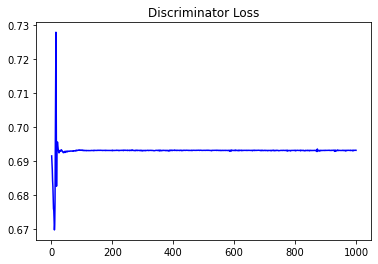

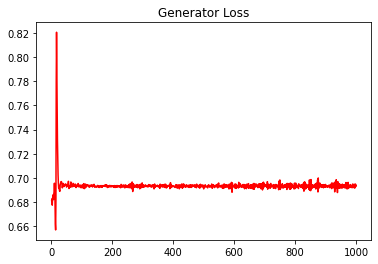

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.007778410874476287


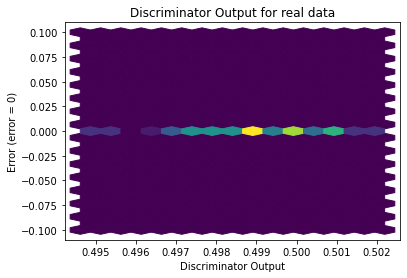

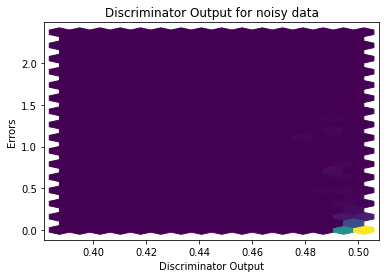

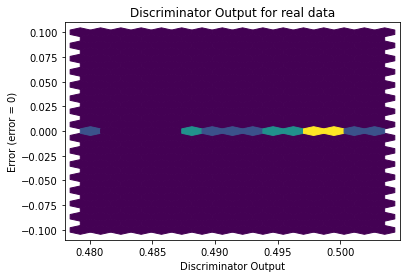

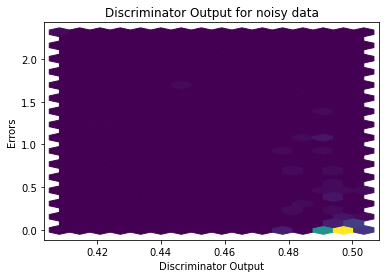

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


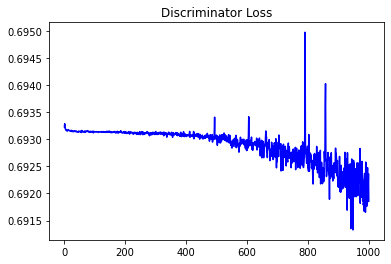

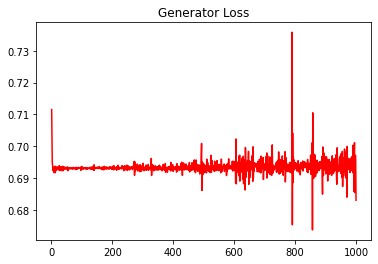

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01083169634255046


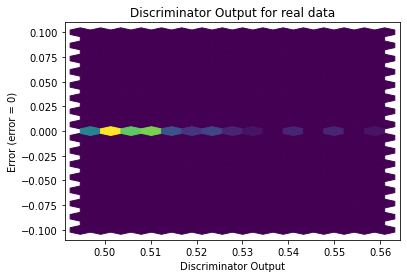

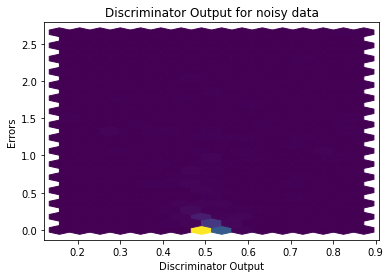

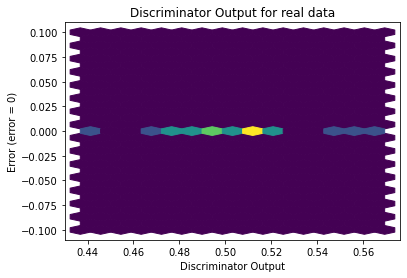

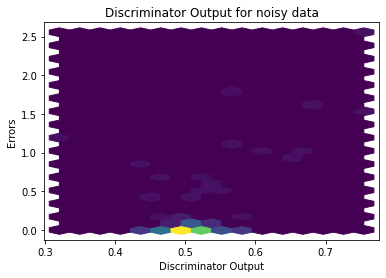

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
